In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import omdb

In [6]:
movies_meta = pd.read_csv('/Users/stephensinclair/Desktop/the-movies-dataset/movies_metadata.csv')
movies_meta.head().T

,0,1,2,3,4
adult,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000,65000000,0,16000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041
original_language,en,en,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...


In [14]:
movies_meta[movies_meta['revenue']>0].shape

(7408, 24)

In [13]:
movies_meta.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [5]:
movies_meta.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

##Features

* **adult**: Indicates if the movie is X-Rated or Adult.
* **belongs_to_collection**: A stringified dictionary that gives information on the movie series the particular film +belongs to.
* **budget**: The budget of the movie in dollars.
* **genres**: A stringified list of dictionaries that list out all the genres associated with the movie.
* **homepage**: The Official Homepage of the move.
* **id** : The ID of the move.
* **imdb_id**: The IMDB ID of the movie.
* **original_language**: The language in which the movie was originally shot in.
* **original_title**: The original title of the movie.
* **overview**: A brief blurb of the movie.
* **popularity**: The Popularity Score assigned by TMDB.
* **poster_path**: The URL of the poster image.
* **production_companies**: A stringified list of production companies involved with the making of the movie.
* **production_countries**: A stringified list of countries where the movie was shot/produced in.
* **release_date**: Theatrical Release Date of the movie.
* **revenue**: The total revenue of the movie in dollars.
* **runtime**: The runtime of the movie in minutes.
* **spoken_languages**: A stringified list of spoken languages in the film.
* **status**: The status of the movie (Released, To Be Released, Announced, etc.)
* **tagline**: The tagline of the movie.
* **title**: The Official Title of the movie.
* **video**: Indicates if there is a video present of the movie with TMDB.
* **vote_average**: The average rating of the movie.
* **vote_count**: The number of votes by users, as counted by TMDB.

In [7]:
movies_meta[movies_meta['status']=='Released']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0


In [8]:
movies_meta.shape

(45466, 24)

In [9]:
movies_meta['revenue'].isnull().sum()

6

In [10]:
movies_meta[movies_meta['budget']==0]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count


In [15]:
meta_rev = movies_meta[movies_meta['revenue']>0].copy()

In [17]:
meta_rev.head().T

,0,1,3,4,5
adult,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,NaN,"{'id': 96871, 'name': 'Father of the Bride Col...",NaN
budget,30000000,65000000,16000000,0,60000000
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,31357,11862,949
imdb_id,tt0114709,tt0113497,tt0114885,tt0113041,tt0113277
original_language,en,en,en,en,en
original_title,Toy Story,Jumanji,Waiting to Exhale,Father of the Bride Part II,Heat
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...,"Obsessive master thief, Neil McCauley leads a ..."


In [18]:
meta_rev.shape

(7408, 24)

In [19]:
meta_rev.isnull().sum()

adult                       0
belongs_to_collection    5925
budget                      0
genres                      0
homepage                 5040
id                          0
imdb_id                     0
original_language           0
original_title              0
overview                   22
popularity                  0
poster_path                 2
production_companies        0
production_countries        0
release_date                1
revenue                     0
runtime                     6
spoken_languages            0
status                      2
tagline                  1461
title                       0
video                       0
vote_average                0
vote_count                  0
dtype: int64

In [21]:
meta_rev[meta_rev['budget'].astype(int)>0]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0
10,False,NaN,62000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,9087,tt0112346,en,The American President,"Widowed U.S. president Andrew Shepherd, one of...",...,1995-11-17,107879496.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Why can't the most powerful man in the world h...,The American President,False,6.5,199.0
13,False,NaN,44000000,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",NaN,10858,tt0113987,en,Nixon,An all-star cast powers this epic look at Amer...,...,1995-12-22,13681765.0,192.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Triumphant in Victory, Bitter in Defeat. He Ch...",Nixon,False,7.1,72.0
14,False,NaN,98000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,1408,tt0112760,en,Cutthroat Island,"Morgan Adams and her slave, William Shaw, are ...",...,1995-12-22,10017322.0,119.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Course Has Been Set. There Is No Turning B...,Cutthroat Island,False,5.7,137.0
15,False,NaN,52000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,524,tt0112641,en,Casino,The life of the gambling paradise – Las Vegas ...,...,1995-11-22,116112375.0,178.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No one stays at the top forever.,Casino,False,7.8,1343.0


In [22]:
meta_rev[meta_rev['budget'].astype(int)>0].shape

(5381, 24)

In [23]:
meta_sub = meta_rev[meta_rev['budget'].astype(int)>0].copy()

In [24]:
meta_sub.head().T

,0,1,3,5,8
adult,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,NaN,NaN,NaN
budget,30000000,65000000,16000000,60000000,35000000
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,31357,949,9091
imdb_id,tt0114709,tt0113497,tt0114885,tt0113277,tt0114576
original_language,en,en,en,en,en
original_title,Toy Story,Jumanji,Waiting to Exhale,Heat,Sudden Death
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,"Cheated on, mistreated and stepped on, the wom...","Obsessive master thief, Neil McCauley leads a ...",International action superstar Jean Claude Van...


In [25]:
meta_sub.shape

(5381, 24)

In [26]:
meta_sub.isnull().sum()

adult                       0
belongs_to_collection    4157
budget                      0
genres                      0
homepage                 3466
id                          0
imdb_id                     0
original_language           0
original_title              0
overview                   11
popularity                  0
poster_path                 0
production_companies        0
production_countries        0
release_date                0
revenue                     0
runtime                     1
spoken_languages            0
status                      0
tagline                   752
title                       0
video                       0
vote_average                0
vote_count                  0
dtype: int64

In [30]:
omdb.set_default('apikey', 'bd11b816')
omdb.set_default('timeout', 5)

In [31]:
omdb_list = [omdb.imdbid(i) for i in meta_sub['imdb_id']]

In [44]:
# Create a dataframe with the corresponding OMDB data for the 5381 movies in the meta dataset
omdb = pd.DataFrame(omdb_list)
omdb.head().T

,0,1,2,3,4
actors,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney","Robin Williams, Jonathan Hyde, Kirsten Dunst, ...","Whitney Houston, Angela Bassett, Loretta Devin...","Al Pacino, Robert De Niro, Val Kilmer, Jon Voight","Jean-Claude Van Damme, Powers Boothe, Raymond ..."
awards,Nominated for 3 Oscars. Another 23 wins & 17 n...,4 wins & 9 nominations.,8 wins & 9 nominations.,12 nominations.,N/A
box_office,N/A,N/A,N/A,N/A,N/A
country,USA,USA,USA,USA,USA
director,John Lasseter,Joe Johnston,Forest Whitaker,Michael Mann,Peter Hyams
dvd,20 Mar 2001,25 Jan 2000,06 Mar 2001,27 Jul 1999,01 Nov 1998
genre,"Animation, Adventure, Comedy, Family, Fantasy","Adventure, Comedy, Family, Fantasy","Comedy, Drama, Romance","Crime, Drama, Thriller","Action, Crime, Thriller"
imdb_id,tt0114709,tt0113497,tt0114885,tt0113277,tt0114576
imdb_rating,8.3,7.0,5.8,8.2,5.7
imdb_votes,"783,232","267,973","8,640","520,149","29,773"


In [33]:
omdb.shape

(5381, 26)

In [34]:
omdb.isnull().sum()

actors              0
awards              0
box_office          2
country             0
director            0
dvd                 2
genre               0
imdb_id             0
imdb_rating         0
imdb_votes          0
language            0
metascore           0
plot                0
poster              0
production          2
rated               0
ratings             0
released            0
response            0
runtime             0
title               0
total_seasons    5379
type                0
website             2
writer              0
year                0
dtype: int64

In [36]:
omdb.to_csv('/Users/stephensinclair/Desktop/omdb_tmdb/omdb_by_tmdb.csv')

In [38]:
meta_view = meta_sub[['imdb_id', 'budget', 'overview', 'revenue', 'runtime', 'tagline']]
meta_view.head()

,imdb_id,budget,overview,revenue,runtime,tagline
0,tt0114709,30000000,"Led by Woody, Andy's toys live happily in his ...",373554033.0,81.0,NaN
1,tt0113497,65000000,When siblings Judy and Peter discover an encha...,262797249.0,104.0,Roll the dice and unleash the excitement!
3,tt0114885,16000000,"Cheated on, mistreated and stepped on, the wom...",81452156.0,127.0,Friends are the people who let you be yourself...
5,tt0113277,60000000,"Obsessive master thief, Neil McCauley leads a ...",187436818.0,170.0,A Los Angeles Crime Saga
8,tt0114576,35000000,International action superstar Jean Claude Van...,64350171.0,106.0,Terror goes into overtime.


In [39]:
omdb_view = omdb[['imdb_id', 'actors', 'country', 'director', 'genre', 'title', 'writer', 'year']]
omdb_view.head()

,imdb_id,actors,country,director,genre,title,writer,year
0,tt0114709,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney",USA,John Lasseter,"Animation, Adventure, Comedy, Family, Fantasy",Toy Story,"John Lasseter (original story by), Pete Docter...",1995
1,tt0113497,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",USA,Joe Johnston,"Adventure, Comedy, Family, Fantasy",Jumanji,"Jonathan Hensleigh (screenplay by), Greg Taylo...",1995
2,tt0114885,"Whitney Houston, Angela Bassett, Loretta Devin...",USA,Forest Whitaker,"Comedy, Drama, Romance",Waiting to Exhale,"Terry McMillan (novel), Terry McMillan (screen...",1995
3,tt0113277,"Al Pacino, Robert De Niro, Val Kilmer, Jon Voight",USA,Michael Mann,"Crime, Drama, Thriller",Heat,Michael Mann,1995
4,tt0114576,"Jean-Claude Van Damme, Powers Boothe, Raymond ...",USA,Peter Hyams,"Action, Crime, Thriller",Sudden Death,"Karen Elise Baldwin (story), Gene Quintano (sc...",1995


In [51]:
result = pd.merge(meta_view, omdb_view, how='inner', on=['imdb_id', 'imdb_id'])
result.head()

,imdb_id,budget,overview,revenue,runtime,tagline,actors,country,director,genre,title,writer,year
0,tt0114709,30000000,"Led by Woody, Andy's toys live happily in his ...",373554033.0,81.0,NaN,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney",USA,John Lasseter,"Animation, Adventure, Comedy, Family, Fantasy",Toy Story,"John Lasseter (original story by), Pete Docter...",1995
1,tt0113497,65000000,When siblings Judy and Peter discover an encha...,262797249.0,104.0,Roll the dice and unleash the excitement!,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",USA,Joe Johnston,"Adventure, Comedy, Family, Fantasy",Jumanji,"Jonathan Hensleigh (screenplay by), Greg Taylo...",1995
2,tt0114885,16000000,"Cheated on, mistreated and stepped on, the wom...",81452156.0,127.0,Friends are the people who let you be yourself...,"Whitney Houston, Angela Bassett, Loretta Devin...",USA,Forest Whitaker,"Comedy, Drama, Romance",Waiting to Exhale,"Terry McMillan (novel), Terry McMillan (screen...",1995
3,tt0113277,60000000,"Obsessive master thief, Neil McCauley leads a ...",187436818.0,170.0,A Los Angeles Crime Saga,"Al Pacino, Robert De Niro, Val Kilmer, Jon Voight",USA,Michael Mann,"Crime, Drama, Thriller",Heat,Michael Mann,1995
4,tt0114576,35000000,International action superstar Jean Claude Van...,64350171.0,106.0,Terror goes into overtime.,"Jean-Claude Van Damme, Powers Boothe, Raymond ...",USA,Peter Hyams,"Action, Crime, Thriller",Sudden Death,"Karen Elise Baldwin (story), Gene Quintano (sc...",1995


In [41]:
result.to_csv('/Users/stephensinclair/Desktop/omdb_tmdb/final.csv')

In [52]:
result.shape

(5391, 13)

In [43]:
result.isnull().sum()

imdb_id       0
budget        0
overview     11
revenue       0
runtime       1
tagline     755
actors        0
country       0
director      0
genre         0
title         0
writer        0
year          0
dtype: int64

In [54]:
result[result.duplicated()==True]

,imdb_id,budget,overview,revenue,runtime,tagline,actors,country,director,genre,title,writer,year
326,tt0022879,4,British nurse Catherine Barkley (Helen Hayes) ...,25.0,89.0,Every woman who has loved will understand,"Helen Hayes, Gary Cooper, Adolphe Menjou, Mary...",USA,Frank Borzage,"Drama, Romance, War",A Farewell to Arms,"Benjamin Glazer (screenplay), Oliver H.P. Garr...",1932
327,tt0022879,4,British nurse Catherine Barkley (Helen Hayes) ...,25.0,89.0,Every woman who has loved will understand,"Helen Hayes, Gary Cooper, Adolphe Menjou, Mary...",USA,Frank Borzage,"Drama, Romance, War",A Farewell to Arms,"Benjamin Glazer (screenplay), Oliver H.P. Garr...",1932
328,tt0022879,4,British nurse Catherine Barkley (Helen Hayes) ...,25.0,89.0,Every woman who has loved will understand,"Helen Hayes, Gary Cooper, Adolphe Menjou, Mary...",USA,Frank Borzage,"Drama, Romance, War",A Farewell to Arms,"Benjamin Glazer (screenplay), Oliver H.P. Garr...",1932
1500,tt0235679,16000000,When Molly Hale's sadness of her father's disa...,68411275.0,93.0,Pokémon: Spell of the Unknown,"Rica Matsumoto, Veronica Taylor, Rachael Lilli...",Japan,"Kunihiko Yuyama, Michael Haigney","Animation, Action, Adventure, Family, Fantasy,...",Pokémon 3: The Movie,"Norman J. Grossfeld (english version), Michael...",2000
1501,tt0235679,16000000,When Molly Hale's sadness of her father's disa...,68411275.0,93.0,Pokémon: Spell of the Unknown,"Rica Matsumoto, Veronica Taylor, Rachael Lilli...",Japan,"Kunihiko Yuyama, Michael Haigney","Animation, Action, Adventure, Family, Fantasy,...",Pokémon 3: The Movie,"Norman J. Grossfeld (english version), Michael...",2000
1502,tt0235679,16000000,When Molly Hale's sadness of her father's disa...,68411275.0,93.0,Pokémon: Spell of the Unknown,"Rica Matsumoto, Veronica Taylor, Rachael Lilli...",Japan,"Kunihiko Yuyama, Michael Haigney","Animation, Action, Adventure, Family, Fantasy,...",Pokémon 3: The Movie,"Norman J. Grossfeld (english version), Michael...",2000
1568,tt2018086,3512454,"Winter, 1915. Confined by her family to an asy...",115860.0,95.0,NaN,"Juliette Binoche, Jean-Luc Vincent, Jessica Er...",France,Bruno Dumont,"Biography, Drama",Camille Claudel 1915,"Paul Claudel (letters), Camille Claudel (lette...",2013
1569,tt2018086,3512454,"Winter, 1915. Confined by her family to an asy...",115860.0,95.0,NaN,"Juliette Binoche, Jean-Luc Vincent, Jessica Er...",France,Bruno Dumont,"Biography, Drama",Camille Claudel 1915,"Paul Claudel (letters), Camille Claudel (lette...",2013
1570,tt2018086,3512454,"Winter, 1915. Confined by her family to an asy...",115860.0,95.0,NaN,"Juliette Binoche, Jean-Luc Vincent, Jessica Er...",France,Bruno Dumont,"Biography, Drama",Camille Claudel 1915,"Paul Claudel (letters), Camille Claudel (lette...",2013
1774,tt0157472,26000000,"Until now, Zak Gibbs' greatest challenge has b...",38793283.0,94.0,"The adventure of a lifetime, in a few mere sec...","Jesse Bradford, French Stewart, Paula Garcés, ...",USA,Jonathan Frakes,"Action, Adventure, Comedy, Sci-Fi, Thriller",Clockstoppers,"Rob Hedden (story), Andy Hedden (story), J. Da...",2002


In [60]:
movies = result.drop([327,328,1501,1502,1569,1570,1775,1776,1964,1965,2839,2840], axis=0).copy()

In [61]:
movies.shape

(5379, 13)

In [62]:
movies.to_csv('/Users/stephensinclair/Desktop/omdb_tmdb/movies.csv')

In [63]:
movies.head()

,imdb_id,budget,overview,revenue,runtime,tagline,actors,country,director,genre,title,writer,year
0,tt0114709,30000000,"Led by Woody, Andy's toys live happily in his ...",373554033.0,81.0,NaN,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney",USA,John Lasseter,"Animation, Adventure, Comedy, Family, Fantasy",Toy Story,"John Lasseter (original story by), Pete Docter...",1995
1,tt0113497,65000000,When siblings Judy and Peter discover an encha...,262797249.0,104.0,Roll the dice and unleash the excitement!,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",USA,Joe Johnston,"Adventure, Comedy, Family, Fantasy",Jumanji,"Jonathan Hensleigh (screenplay by), Greg Taylo...",1995
2,tt0114885,16000000,"Cheated on, mistreated and stepped on, the wom...",81452156.0,127.0,Friends are the people who let you be yourself...,"Whitney Houston, Angela Bassett, Loretta Devin...",USA,Forest Whitaker,"Comedy, Drama, Romance",Waiting to Exhale,"Terry McMillan (novel), Terry McMillan (screen...",1995
3,tt0113277,60000000,"Obsessive master thief, Neil McCauley leads a ...",187436818.0,170.0,A Los Angeles Crime Saga,"Al Pacino, Robert De Niro, Val Kilmer, Jon Voight",USA,Michael Mann,"Crime, Drama, Thriller",Heat,Michael Mann,1995
4,tt0114576,35000000,International action superstar Jean Claude Van...,64350171.0,106.0,Terror goes into overtime.,"Jean-Claude Van Damme, Powers Boothe, Raymond ...",USA,Peter Hyams,"Action, Crime, Thriller",Sudden Death,"Karen Elise Baldwin (story), Gene Quintano (sc...",1995


In [64]:
movies.shape

(5379, 13)

In [65]:
movies.describe()

,revenue,runtime
count,5.379000e+03,5378.000000
mean,9.035117e+07,109.828933
std,1.661643e+08,22.044938
min,1.000000e+00,0.000000
25%,7.020199e+06,95.000000
50%,2.992247e+07,106.000000
75%,9.998288e+07,120.000000
max,2.787965e+09,338.000000


In [67]:
movies['year'] = movies['year'].astype(int)

In [69]:
movies['budget'] = movies['budget'].astype(int)

In [71]:
movies['revenue'] = movies['revenue'].astype(int)

In [74]:
movies[movies['runtime'].isnull()==True]

,imdb_id,budget,overview,revenue,runtime,tagline,actors,country,director,genre,title,writer,year
5327,tt1107828,6000000,NaN,31000,NaN,NaN,"Sergey Astakhov, Natalya Fateeva, Roman Indyk,...",Russia,Yuriy Kara,"Biography, Drama",Korolyov,Yuriy Kara (screenplay),2007


In [77]:
movies.at[5327, 'runtime'] = 130

In [78]:
movies.at[5327, 'runtime']

130.0

In [80]:
movies['runtime'] = movies['runtime'].astype(int)

In [81]:
movies.describe()

,budget,revenue,runtime,year
count,5.379000e+03,5.379000e+03,5379.000000,5379.000000
mean,3.110622e+07,9.035117e+07,109.832683,1999.736940
std,4.016572e+07,1.661643e+08,22.044604,15.911647
min,1.000000e+00,1.000000e+00,0.000000,1915.000000
25%,5.092316e+06,7.020199e+06,95.000000,1994.000000
50%,1.700000e+07,2.992247e+07,106.000000,2004.000000
75%,4.000000e+07,9.998288e+07,120.000000,2011.000000
max,3.800000e+08,2.787965e+09,338.000000,2017.000000


In [82]:
movies.isnull().sum()

imdb_id       0
budget        0
overview     11
revenue       0
runtime       0
tagline     751
actors        0
country       0
director      0
genre         0
title         0
writer        0
year          0
dtype: int64

In [83]:
movies.to_csv('/Users/stephensinclair/Desktop/omdb_tmdb/movies.csv')

In [84]:
movies.head()

,imdb_id,budget,overview,revenue,runtime,tagline,actors,country,director,genre,title,writer,year
0,tt0114709,30000000,"Led by Woody, Andy's toys live happily in his ...",373554033,81,NaN,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney",USA,John Lasseter,"Animation, Adventure, Comedy, Family, Fantasy",Toy Story,"John Lasseter (original story by), Pete Docter...",1995
1,tt0113497,65000000,When siblings Judy and Peter discover an encha...,262797249,104,Roll the dice and unleash the excitement!,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",USA,Joe Johnston,"Adventure, Comedy, Family, Fantasy",Jumanji,"Jonathan Hensleigh (screenplay by), Greg Taylo...",1995
2,tt0114885,16000000,"Cheated on, mistreated and stepped on, the wom...",81452156,127,Friends are the people who let you be yourself...,"Whitney Houston, Angela Bassett, Loretta Devin...",USA,Forest Whitaker,"Comedy, Drama, Romance",Waiting to Exhale,"Terry McMillan (novel), Terry McMillan (screen...",1995
3,tt0113277,60000000,"Obsessive master thief, Neil McCauley leads a ...",187436818,170,A Los Angeles Crime Saga,"Al Pacino, Robert De Niro, Val Kilmer, Jon Voight",USA,Michael Mann,"Crime, Drama, Thriller",Heat,Michael Mann,1995
4,tt0114576,35000000,International action superstar Jean Claude Van...,64350171,106,Terror goes into overtime.,"Jean-Claude Van Damme, Powers Boothe, Raymond ...",USA,Peter Hyams,"Action, Crime, Thriller",Sudden Death,"Karen Elise Baldwin (story), Gene Quintano (sc...",1995


In [88]:
movies['genre'].value_counts()[0:20]

Comedy, Drama, Romance                 231
Comedy                                 207
Drama                                  200
Comedy, Drama                          170
Drama, Romance                         166
Comedy, Romance                        142
Crime, Drama, Thriller                 106
Action, Crime, Thriller                 89
Action, Crime, Drama, Thriller          76
Horror, Thriller                        75
Crime, Drama, Mystery, Thriller         72
Crime, Drama                            69
Action, Adventure, Sci-Fi               68
Drama, Thriller                         63
Horror, Mystery, Thriller               61
Comedy, Crime                           50
Action, Adventure, Thriller             50
Action, Adventure, Sci-Fi, Thriller     46
Horror                                  45
Biography, Drama                        43
Name: genre, dtype: int64

In [236]:
cdr = movies[movies['genre']=='Comedy, Drama, Romance']

In [181]:
table = pd.DataFrame(pd.pivot_table(cdr, values = 'revenue', index='year', aggfunc=np.sum))
table

,revenue
year,
1931,19181
1938,7433101
1954,10000000
1960,33000000
1961,9600655
1967,104945305
1969,30000000
1974,4000000
1978,24000019


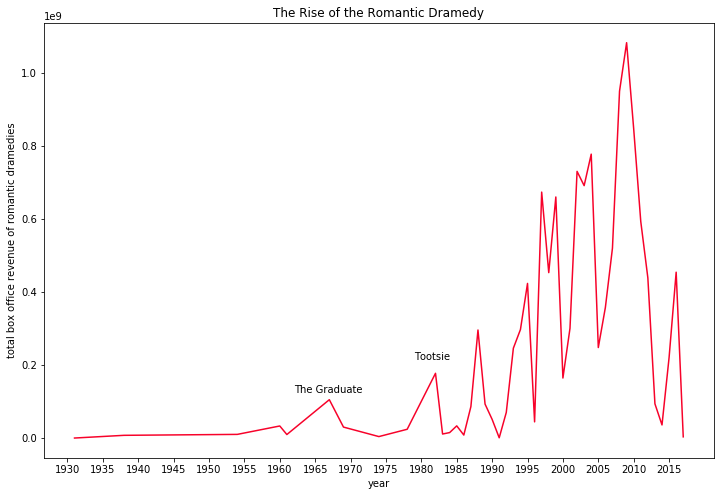

In [185]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(table, c='xkcd:cherry red')
plt.xticks(np.arange(1930, 2018, 5))

plt.title('The Rise of the Romantic Dramedy')
plt.xlabel('year')
plt.ylabel('total box office revenue of romantic dramedies')

ax.text(1962,125000000, 'The Graduate')
ax.text(1979,215000000, 'Tootsie')

plt.show()

In [135]:
movies[(movies['genre']=='Comedy, Drama, Romance') & (movies['year']==1988)]

,imdb_id,budget,overview,revenue,runtime,tagline,actors,country,director,genre,title,writer,year
809,tt0096463,28000000,"Witty, romantic look at life in the corporate ...",103173635,114,For anyone who's ever won. For anyone who's ev...,"Harrison Ford, Sigourney Weaver, Melanie Griff...",USA,Mike Nichols,"Comedy, Drama, Romance",Working Girl,Kevin Wade,1988
1427,tt0095927,15000000,Lilah Krytsick is a mother and housewife who's...,21032267,123,Dying is easy. Comedy is hard.,"Sally Field, Tom Hanks, John Goodman, Mark Rydell",USA,David Seltzer,"Comedy, Drama, Romance",Punchline,David Seltzer,1988
1571,tt0094889,20000000,A talented New York bartender takes a job at a...,171504781,104,"When he pours, he reigns.","Tom Cruise, Bryan Brown, Elisabeth Shue, Lisa ...",USA,Roger Donaldson,"Comedy, Drama, Romance",Cocktail,Heywood Gould (screenplay),1988


In [186]:
movies[(movies['genre']=='Comedy, Drama, Romance') & (movies['year']==2015)]

,imdb_id,budget,overview,revenue,runtime,tagline,actors,country,director,genre,title,writer,year
4688,tt3172532,2000000,Minnie Goetze is a 15-year-old aspiring comic-...,1477002,98,Some things are best kept secret.,"Bel Powley, Willie, Kristen Wiig, Abby Wait",USA,Marielle Heller,"Comedy, Drama, Romance",The Diary of a Teenage Girl,"Phoebe Gloeckner (novel), Marielle Heller (scr...",2015
4772,tt3152624,35000000,Having thought that monogamy was never possibl...,140795793,125,We All Know One.,"Colin Quinn, Devin Fabry, Carla Oudin, Amy Sch...","USA, Japan",Judd Apatow,"Comedy, Drama, Romance",Trainwreck,Amy Schumer,2015
4774,tt1243974,37000000,A celebrated military contractor returns to th...,26250020,105,Sometimes you have to say goodbye before you c...,"Bradley Cooper, Emma Stone, Rachel McAdams, Bi...",USA,Cameron Crowe,"Comedy, Drama, Romance",Aloha,Cameron Crowe,2015
4957,tt4679210,6200000,"Three stages in George's life, and three girls...",11000000,165,Love,"Nivin Pauly, Sai Pallavi, Madonna Sebastian, A...",India,Alphonse Puthren,"Comedy, Drama, Romance",Premam,Alphonse Puthren,2015
5043,tt4110568,13000000,Dil Dhadakne Do is a story about a dysfunction...,22000000,170,NaN,"Anil Kapoor, Shefali Shah, Priyanka Chopra, Ra...",India,Zoya Akhtar,"Comedy, Drama, Romance",Dil Dhadakne Do,"Zoya Akhtar (story and screenplay), Reema Kagt...",2015
5045,tt3766394,1000000,A self-help seminar inspires a sixty-something...,14444999,95,She's not ready to act her age,"Sally Field, Edmund Lupinski, Norma Michaels, ...",USA,Michael Showalter,"Comedy, Drama, Romance","Hello, My Name Is Doris","Laura Terruso (screenplay), Michael Showalter ...",2015
5111,tt4501454,3200000,An aging widow from New York City follows her ...,4267218,100,NaN,"Susan Sarandon, Rose Byrne, J.K. Simmons, Jerr...",USA,Lorene Scafaria,"Comedy, Drama, Romance",The Meddler,Lorene Scafaria,2015


In [156]:
table.reset_index(level=0, inplace=True)

In [157]:
table.head()

,year,revenue
0,1931,19181
1,1938,7433101
2,1954,10000000
3,1960,33000000
4,1961,9600655


In [158]:
table.shape

(45, 2)

In [137]:
price = pd.read_csv('/Users/stephensinclair/Desktop/omdb_tmdb/ticket_price_by year.csv')
price.head()

,year,price
0,2019,9.01
1,2018,9.11
2,2017,8.97
3,2016,8.65
4,2015,8.43


In [179]:
price.dtypes

year        int64
 price    float64
dtype: object

In [191]:
dramedy_adj = pd.merge(table, price, how='left', on=['year', 'year']).copy()
dramedy_adj.shape

(45, 3)

In [192]:
dramedy_adj.head()

,year,revenue,price
0,1931,19181,0.35
1,1938,7433101,0.25
2,1954,10000000,0.45
3,1960,33000000,0.51
4,1961,9600655,0.69


In [193]:
dramedy_adj[' price']

0     0.35
1     0.25
2     0.45
3     0.51
4     0.69
5     1.20
6     1.42
7     1.87
8     2.34
9     2.94
10    3.15
11    3.36
12    3.55
13    3.71
14    3.91
15    4.11
16    3.97
17    4.23
18    4.21
19    4.15
20    4.14
21    4.18
22    4.35
23    4.42
24    4.59
25    4.69
26    5.08
27    5.39
28    5.66
29    5.81
30    6.03
31    6.21
32    6.41
33    6.55
34    6.88
35    7.18
36    7.50
37    7.89
38    7.93
39    7.96
40    8.13
41    8.17
42    8.43
43    8.65
44    8.97
Name:  price, dtype: float64

In [199]:
current_price = 9.01
dramedy_adj['revenue_adj'] = dramedy_adj['revenue'] * (current_price/dramedy_adj[' price'])
dramedy_adj.head()

,year,revenue,price,revenue_adj
0,1931,19181,0.35,4.937737e+05
1,1938,7433101,0.25,2.678890e+08
2,1954,10000000,0.45,2.002222e+08
3,1960,33000000,0.51,5.830000e+08
4,1961,9600655,0.69,1.253651e+08


In [198]:
dramedy_adj.dtypes

year             int64
revenue          int64
 price         float64
revenue_adj    float64
dtype: object

In [200]:
dramedy_adj.head(45)

,year,revenue,price,revenue_adj
0,1931,19181,0.35,4.937737e+05
1,1938,7433101,0.25,2.678890e+08
2,1954,10000000,0.45,2.002222e+08
3,1960,33000000,0.51,5.830000e+08
4,1961,9600655,0.69,1.253651e+08
5,1967,104945305,1.20,7.879643e+08
6,1969,30000000,1.42,1.903521e+08
7,1974,4000000,1.87,1.927273e+07
8,1978,24000019,2.34,9.241033e+07
9,1982,177200000,2.94,5.430517e+08


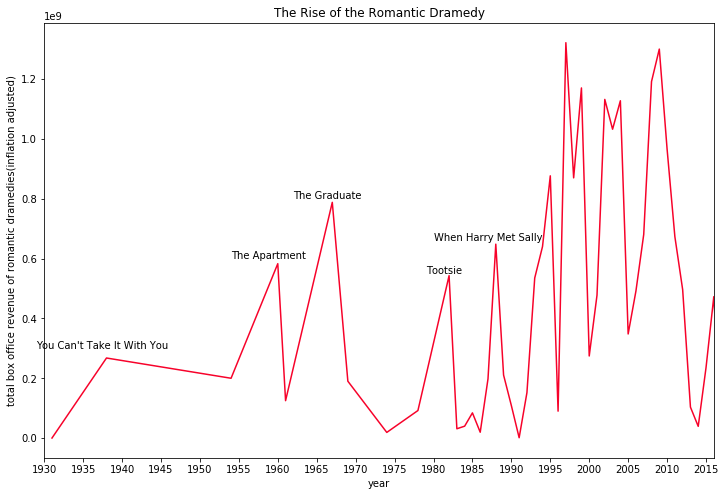

In [263]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(dramedy_adj['year'], dramedy_adj['revenue_adj'], c='xkcd:cherry red')
plt.xticks(np.arange(1930, 2018, 5))

plt.xlim(1930,2016)
plt.title('The Rise of the Romantic Dramedy')
plt.xlabel('year')
plt.ylabel('total box office revenue of romantic dramedies(inflation adjusted)')

ax.text(1929, 300000000, "You Can't Take It With You")
ax.text(1954, 600000000, 'The Apartment')
ax.text(1962,800000000, 'The Graduate')
ax.text(1979,550000000, 'Tootsie')
ax.text(1980, 660000000, 'When Harry Met Sally')

plt.show()

In [264]:
movies[(movies['genre']=='Comedy, Drama, Romance') & (movies['year']==2016)]

,imdb_id,budget,overview,revenue,runtime,tagline,actors,country,director,genre,title,writer,year
4969,tt1292566,38000000,New York City is full of lonely hearts seeking...,112343513,110,Welcome to the party,"Dakota Johnson, Rebel Wilson, Leslie Mann, Dam...",USA,Christian Ditter,"Comedy, Drama, Romance",How to Be Single,"Abby Kohn (screenplay), Marc Silverstein (scre...",2016
5055,tt3068194,3000000,"From Jane Austen’s novella, the beautiful and ...",14016568,94,A lady never reveals her tactics.,"Kate Beckinsale, Morfydd Clark, Tom Bennett, J...","Ireland, France, Netherlands",Whit Stillman,"Comedy, Drama, Romance",Love & Friendship,"Whit Stillman, Jane Austen (based on her novel...",2016
5059,tt5247022,5000000,"Set in the present in Paterson, New Jersey, th...",2152738,118,"If you ever left me, I'd tear my heart out and...","Adam Driver, Golshifteh Farahani, Nellie, Rizw...","France, Germany, USA",Jim Jarmusch,"Comedy, Drama, Romance",Paterson,"Jim Jarmusch, William Carlos Williams (poem), ...",2016
5089,tt4824302,25000000,Intersecting stories with different moms colli...,48418160,118,Celebrate the one day that connects us all,"Jennifer Aniston, Timothy Olyphant, Shay Mitch...",USA,Garry Marshall,"Comedy, Drama, Romance",Mother's Day,"Anya Kochoff (screenplay), Matthew Walker (scr...",2016
5094,tt2980210,30000000,"Alan Clay, a struggling American businessman, ...",4212494,97,How far will you go? To find yourself.,"Tom Hanks, Omar Elba, Sarita Choudhury, Sidse ...","UK, France, Germany, Mexico, USA",Tom Tykwer,"Comedy, Drama, Romance",A Hologram for the King,"Dave Eggers (novel), Tom Tykwer (screenplay)",2016
5114,tt4513674,30000000,The story of a young man who arrives in Hollyw...,43763247,96,Anyone who is anyone will be seen at Café Soci...,"Steve Carell, Sheryl Lee, Todd Weeks, Paul Sch...",USA,Woody Allen,"Comedy, Drama, Romance",Café Society,Woody Allen,2016
5166,tt5824826,200000,Raj Kandukuri and BiG Ben Films in association...,5500000,124,NaN,"Abhay Bethiganti, Keshav Deepak, Vijay Deverak...",India,Tharun Bhascker Dhaassyam,"Comedy, Drama, Romance",Pelli Choopulu,"Tharun Bhascker Dhaassyam, Rahul Ramakrishna (...",2016
5168,tt1473832,35000000,Breaking up with Mark Darcy leaves Bridget Jon...,211952420,123,Old flame. New fling. Big problem.,"Renée Zellweger, Gemma Jones, Jim Broadbent, S...","USA, France, China, UK",Sharon Maguire,"Comedy, Drama, Romance",Bridget Jones's Baby,"Helen Fielding (screenplay), Dan Mazer (screen...",2016
5193,tt3714720,3800000,"Aspiring New York City artist, John Hollar ret...",1016985,105,NaN,"Margo Martindale, Sharlto Copley, Richard Jenk...",USA,John Krasinski,"Comedy, Drama, Romance",The Hollars,Jim Strouse,2016
5236,tt1974420,25000000,"It's Hollywood, 1958. Small town beauty queen ...",3885342,127,NaN,"Steve Tom, Paul Sorvino, Peter Mackenzie, Ivar...",USA,Warren Beatty,"Comedy, Drama, Romance",Rules Don't Apply,"Warren Beatty (screenplay by), Warren Beatty (...",2016


In [311]:
movies['genre'].value_counts()[0:50]

Comedy, Drama, Romance                           231
Comedy                                           207
Drama                                            200
Comedy, Drama                                    170
Drama, Romance                                   166
Comedy, Romance                                  142
Crime, Drama, Thriller                           106
Action, Crime, Thriller                           89
Action, Crime, Drama, Thriller                    76
Horror, Thriller                                  75
Crime, Drama, Mystery, Thriller                   72
Crime, Drama                                      69
Action, Adventure, Sci-Fi                         68
Drama, Thriller                                   63
Horror, Mystery, Thriller                         61
Comedy, Crime                                     50
Action, Adventure, Thriller                       50
Action, Adventure, Sci-Fi, Thriller               46
Horror                                        

In [286]:
aas = movies[movies['genre']=='Action, Adventure, Sci-Fi']

In [287]:
aas_table = pd.DataFrame(pd.pivot_table(aas, values = 'revenue', index='year', aggfunc=np.sum))
aas_table.head(45)

,revenue
year,
1916,8000000
1961,7000000
1970,18999718
1980,228566666
1981,50244700
1982,132800000
1983,33019460
1984,146658980
1985,36230219


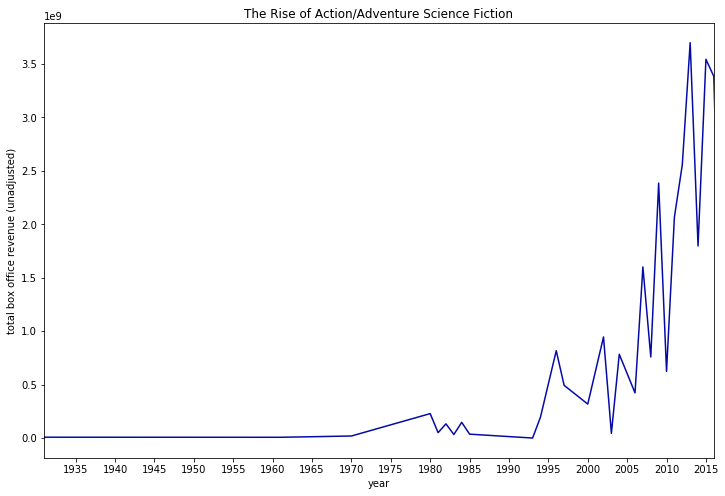

In [267]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(aas_table,c='xkcd:cobalt blue')
plt.xticks(np.arange(1930, 2016, 5))

plt.xlim(1931,2016)

plt.title('The Rise of Action/Adventure Science Fiction')
plt.xlabel('year')
plt.ylabel('total box office revenue (unadjusted)')

# ax.text(1962,125000000, 'The Graduate')
# ax.text(1979,215000000, 'Tootsie')

plt.show()

In [243]:
movies[(movies['genre']=='Action, Adventure, Sci-Fi') & (movies['year']==2012)]

,imdb_id,budget,overview,revenue,runtime,tagline,actors,country,director,genre,title,writer,year
3902,tt0848228,220000000,When an unexpected enemy emerges and threatens...,1519557910,143,Some assembly required.,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",USA,Joss Whedon,"Action, Adventure, Sci-Fi",The Avengers,"Joss Whedon (screenplay), Zak Penn (story), Jo...",2012
4024,tt0401729,260000000,"John Carter is a war-weary, former military ca...",284139100,132,"Lost in our world, found in another.","Taylor Kitsch, Lynn Collins, Samantha Morton, ...",USA,Andrew Stanton,"Action, Adventure, Sci-Fi",John Carter,"Andrew Stanton (screenplay by), Mark Andrews (...",2012
4083,tt0948470,215000000,Peter Parker is an outcast high schooler aband...,752215857,136,The untold story begins.,"Andrew Garfield, Emma Stone, Rhys Ifans, Denis...",USA,Marc Webb,"Action, Adventure, Sci-Fi",The Amazing Spider-Man,"James Vanderbilt (screenplay), Alvin Sargent (...",2012


In [296]:
comedy = movies[movies['genre']=='Comedy']
drama = movies[movies['genre']=='Drama']
dramcom = movies[movies['genre']=='Comedy, Drama']
romcom = movies[movies['genre']=='Comedy, Romance']
aa_fantasy = movies[movies['genre']=='Action, Adventure, Fantasy']

In [297]:
comedy_table = pd.DataFrame(pd.pivot_table(comedy, values = 'revenue', index='year', aggfunc=np.sum))
drama_table = pd.DataFrame(pd.pivot_table(drama, values = 'revenue', index='year', aggfunc=np.sum))
dramcom_table = pd.DataFrame(pd.pivot_table(dramcom, values = 'revenue', index='year', aggfunc=np.sum))
romcom_table = pd.DataFrame(pd.pivot_table(romcom, values = 'revenue', index='year', aggfunc=np.sum))
aa_fantasy_table = pd.DataFrame(pd.pivot_table(aa_fantasy, values = 'revenue', index='year', aggfunc=np.sum))

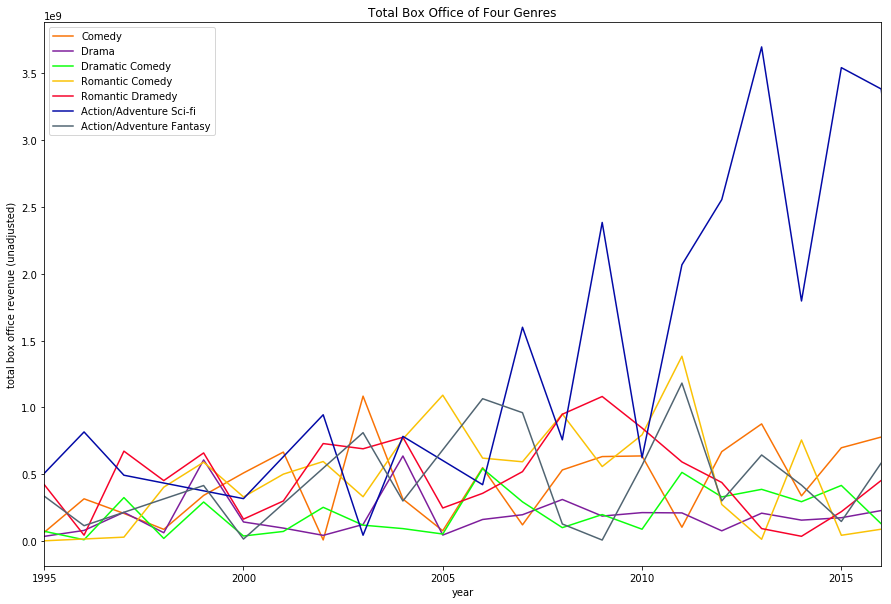

In [305]:
fig, ax = plt.subplots(figsize=(15,10))

plt.plot(comedy_table,c='xkcd:orange', label='Comedy')
plt.plot(drama_table,c='xkcd:purple', label='Drama')
plt.plot(dramcom_table,c='xkcd:neon green', label='Dramatic Comedy')
plt.plot(romcom_table,c='xkcd:goldenrod', label='Romantic Comedy')
plt.plot(table, c='xkcd:cherry red', label='Romantic Dramedy')
plt.plot(aas_table,c='xkcd:cobalt blue', label="Action/Adventure Sci-fi")
plt.plot(aa_fantasy_table,c='xkcd:slate', label="Action/Adventure Fantasy")
plt.legend(loc='best')

plt.xticks(np.arange(1930, 2016, 5))
plt.xlim(1995,2016)
# plt.ylim(0,1500000000)

plt.title('Total Box Office of Four Genres')
plt.xlabel('year')
plt.ylabel('total box office revenue (unadjusted)')

# ax.text(1962,125000000, 'The Graduate')
# ax.text(1979,215000000, 'Tootsie')

plt.show()

In [302]:
movies[(movies['genre']=='Action, Adventure, Sci-Fi') & (movies['year']==2013)]

,imdb_id,budget,overview,revenue,runtime,tagline,actors,country,director,genre,title,writer,year
4240,tt1483013,120000000,Jack Harper is one of the last few drone repai...,286168572,124,Earth is a memory worth fighting for,"Tom Cruise, Morgan Freeman, Olga Kurylenko, An...",USA,Joseph Kosinski,"Action, Adventure, Sci-Fi",Oblivion,"Karl Gajdusek (screenplay), Michael Arndt (scr...",2013
4250,tt1300854,200000000,When Tony Stark's world is torn apart by a for...,1215439994,130,Unleash the power behind the armor.,"Robert Downey Jr., Gwyneth Paltrow, Don Cheadl...",USA,Shane Black,"Action, Adventure, Sci-Fi",Iron Man 3,"Drew Pearce (screenplay by), Shane Black (scre...",2013
4256,tt1408101,190000000,When the crew of the Enterprise is called back...,467365246,132,Earth Will Fall,"Chris Pine, Zachary Quinto, Zoe Saldana, Karl ...",USA,J.J. Abrams,"Action, Adventure, Sci-Fi",Star Trek Into Darkness,"Roberto Orci, Alex Kurtzman, Damon Lindelof, G...",2013
4267,tt1815862,130000000,One thousand years after cataclysmic events fo...,243843127,100,"Danger is real, fear is a choice","Jaden Smith, Will Smith, Sophie Okonedo, Zoë K...",USA,M. Night Shyamalan,"Action, Adventure, Sci-Fi",After Earth,"Gary Whitta (screenplay), M. Night Shyamalan (...",2013
4273,tt0770828,225000000,A young boy learns that he has extraordinary p...,662845518,143,You will believe that a man can fly.,"Henry Cavill, Amy Adams, Michael Shannon, Dian...","USA, UK",Zack Snyder,"Action, Adventure, Sci-Fi",Man of Steel,"David S. Goyer (screenplay), David S. Goyer (s...",2013
4279,tt1663662,180000000,"When legions of monstrous creatures, known as ...",407602906,131,"To Fight Monsters, We Created Monsters","Charlie Hunnam, Diego Klattenhoff, Idris Elba,...",USA,Guillermo del Toro,"Action, Adventure, Sci-Fi",Pacific Rim,"Travis Beacham (screenplay), Guillermo del Tor...",2013
4295,tt1430132,120000000,Wolverine faces his ultimate nemesis - and tes...,415440673,126,"When he's most vulnerable, he's most dangerous.","Hugh Jackman, Tao Okamoto, Rila Fukushima, Hir...","USA, UK",James Mangold,"Action, Adventure, Sci-Fi",The Wolverine,"Mark Bomback (screenplay), Scott Frank (screen...",2013


In [308]:
movies[(movies['genre']=='Action, Adventure') & (movies['year']==2013)]

,imdb_id,budget,overview,revenue,runtime,tagline,actors,country,director,genre,title,writer,year
4597,tt2363213,6500000,Archaeologist Sigurd Svendsen discovers that t...,3721345,120,All myths have an origin,"Pål Sverre Hagen, Nicolai Cleve Broch, Sofia H...",Norway,Mikkel Brænne Sandemose,"Action, Adventure",Ragnarok,John Kåre Raake,2013


In [312]:
movies[movies['director']=='David Yates']

,imdb_id,budget,overview,revenue,runtime,tagline,actors,country,director,genre,title,writer,year
3029,tt0373889,150000000,Returning for his fifth year of study at Hogwa...,938212738,138,Evil Must Be Confronted.,"Daniel Radcliffe, Harry Melling, Jason Boyd, R...","UK, USA",David Yates,"Adventure, Family, Fantasy, Mystery",Harry Potter and the Order of the Phoenix,"Michael Goldenberg (screenplay), J.K. Rowling ...",2007
3406,tt0417741,250000000,"As Harry begins his sixth year at Hogwarts, he...",933959197,153,Dark Secrets Revealed,"Daniel Radcliffe, Michael Gambon, Dave Legeno,...","UK, USA",David Yates,"Adventure, Family, Fantasy, Mystery",Harry Potter and the Half-Blood Prince,"Steve Kloves (screenplay), J.K. Rowling (novel)",2009
3709,tt0926084,250000000,"Harry, Ron and Hermione walk away from their l...",954305868,146,One Way… One Fate… One Hero.,"Bill Nighy, Emma Watson, Richard Griffiths, Ha...","UK, USA",David Yates,"Adventure, Fantasy, Mystery",Harry Potter and the Deathly Hallows: Part 1,"Steve Kloves (screenplay), J.K. Rowling (novel)",2010
3854,tt1201607,125000000,"Harry, Ron and Hermione continue their quest t...",1342000000,130,It all ends here.,"Ralph Fiennes, Michael Gambon, Alan Rickman, D...","USA, UK",David Yates,"Adventure, Drama, Fantasy, Mystery",Harry Potter and the Deathly Hallows: Part 2,"Steve Kloves (screenplay), J.K. Rowling (novel)",2011
4787,tt3183660,180000000,"In 1926, Newt Scamander arrives at the Magical...",809342332,133,From J.K. Rowling's wizarding world.,"Eddie Redmayne, Sam Redford, Scott Goldman, Ti...","UK, USA",David Yates,"Adventure, Family, Fantasy",Fantastic Beasts and Where to Find Them,J.K. Rowling,2016
5128,tt0918940,180000000,"Tarzan, having acclimated to life in London, i...",356743061,109,Human. Nature.,"Alexander Skarsgård, Rory J. Saper, Christian ...","UK, Canada, USA",David Yates,"Action, Adventure, Drama, Fantasy, Romance",The Legend of Tarzan,"Adam Cozad (screenplay by), Craig Brewer (scre...",2016


In [ ]:
# Where are the hunger games movies?